In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans

In [2]:
filename = 'C:/Users/Lenovo/Documents/medical-records-10-yrs/encounter.csv'

encounter_df = pd.read_csv(filename, header=0)
encounter_df.head()

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01T23:44:00Z,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05T14:54:00Z,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12T20:33:00Z,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


## Feature Engineering

In [3]:
encounter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447 entries, 0 to 5446
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provider_Org                  5447 non-null   object 
 1   Encounter_ID                  5447 non-null   object 
 2   Member_ID                     5447 non-null   object 
 3   Provider_ID                   5447 non-null   int64  
 4   Provider_NPI                  5447 non-null   int64  
 5   Clinic_ID                     5447 non-null   object 
 6   Encounter_DateTime            5447 non-null   object 
 7   Encounter_Description         5447 non-null   object 
 8   CC                            2237 non-null   object 
 9   Episode_ID                    5447 non-null   object 
 10  Patient_DOB                   5447 non-null   object 
 11  Patient_Gender                5447 non-null   object 
 12  Facility_Name                 0 non-null      float64
 13  Pro

In [4]:
##Missing values
encounter_df.isnull().sum()

Provider_Org                       0
Encounter_ID                       0
Member_ID                          0
Provider_ID                        0
Provider_NPI                       0
Clinic_ID                          0
Encounter_DateTime                 0
Encounter_Description              0
CC                              3210
Episode_ID                         0
Patient_DOB                        0
Patient_Gender                     0
Facility_Name                   5447
Provider_Name                      0
Specialty                       1904
Clinic_Type                        0
lab_orders_count                   0
lab_results_count                  0
medication_orders_count            0
medication_fulfillment_count       0
vital_sign_count                   0
therapy_orders_count               0
therapy_actions_count              0
immunization_count                 0
Has_Appt                           0
SOAP_Note                       2095
consult_ordered                 4893
D

In [5]:
##Removing missing values
encounter_df['CC'] = encounter_df['CC'].dropna(how='any')
encounter_df['Facility_Name'] = encounter_df['Facility_Name'].dropna(how='any')
encounter_df['Specialty'] = encounter_df['Specialty'].dropna(how='any')
encounter_df['SOAP_Note'] = encounter_df['SOAP_Note'].dropna(how='any')
encounter_df['consult_ordered'] = encounter_df['consult_ordered'].dropna(how='any')

encounter_df.isnull().sum()

Provider_Org                       0
Encounter_ID                       0
Member_ID                          0
Provider_ID                        0
Provider_NPI                       0
Clinic_ID                          0
Encounter_DateTime                 0
Encounter_Description              0
CC                              3210
Episode_ID                         0
Patient_DOB                        0
Patient_Gender                     0
Facility_Name                   5447
Provider_Name                      0
Specialty                       1904
Clinic_Type                        0
lab_orders_count                   0
lab_results_count                  0
medication_orders_count            0
medication_fulfillment_count       0
vital_sign_count                   0
therapy_orders_count               0
therapy_actions_count              0
immunization_count                 0
Has_Appt                           0
SOAP_Note                       2095
consult_ordered                 4893
D

In [6]:
encounter_df.head()

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01T23:44:00Z,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05T14:54:00Z,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12T20:33:00Z,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


## Exploaratory Analysis

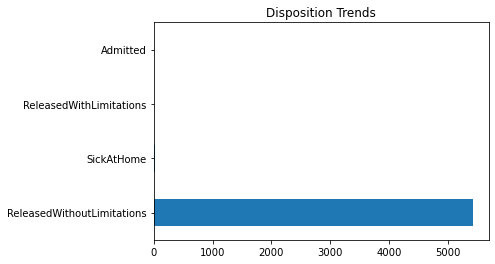

In [7]:
##visualizations
x = encounter_df.Disposition.value_counts()
x.plot(kind='barh')
plt.title('Disposition Trends')
plt.show()

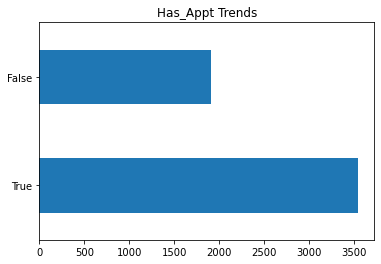

In [8]:
x = encounter_df.Has_Appt.value_counts()
x.plot(kind='barh')
plt.title('Has_Appt Trends')
plt.show()

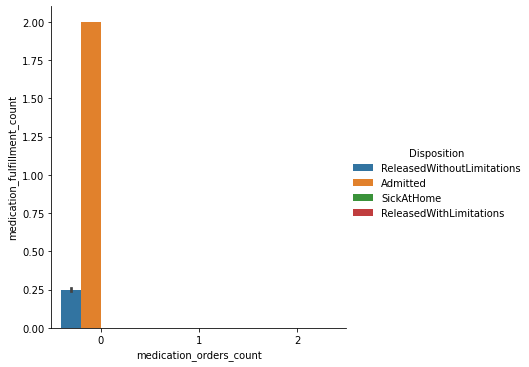

In [9]:
sns.catplot(data=encounter_df, kind="bar", x="medication_orders_count", y="medication_fulfillment_count", hue="Disposition")
plt.show()

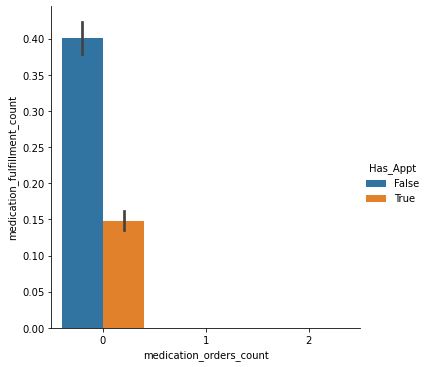

In [10]:
sns.catplot(data=encounter_df, kind="bar", x="medication_orders_count", y="medication_fulfillment_count", hue="Has_Appt")
plt.show()

In [11]:
# cols = ['Provider_Org', 'Encounter_ID', 'Member_ID', 'Provider_ID','Provider_NPI','Clinic_ID','Encounter_DateTime','Encounter_Description','CC','Episode_ID',
#        'SOAP_Note','consult_ordered','Disposition','Specialty','Clinic_Type','lab_orders_count','lab_results_count']

cols_interest = ['medication_orders_count','medication_fulfillment_count','vital_sign_count','therapy_orders_count','therapy_actions_count', 'immunization_count','Has_Appt']
df = encounter_df[cols_interest]

encounter_df = encounter_df.drop(['Provider_Org', 'Encounter_ID', 'Member_ID', 'Provider_ID','Provider_NPI','Clinic_ID','Encounter_DateTime','Encounter_Description','CC','Episode_ID',
       'SOAP_Note','consult_ordered','Disposition','Specialty','Clinic_Type','lab_orders_count','lab_results_count'], axis=1, inplace=True)


## Clustering Approach

In [12]:
df.head()

,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt
0,1,0,7,0,1,0,True
1,0,1,0,0,0,0,False
2,0,0,0,0,0,0,False
3,0,0,7,0,1,1,True
4,0,0,0,0,0,0,False


In [13]:
sc = StandardScaler()
sc.fit_transform(df)

kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 6.10622664e-16  1.00131062e+00 -1.19904087e-14  1.17961196e-16
  -1.33226763e-15 -1.66533454e-16  3.33066907e-16]
 [ 1.00131062e+00 -4.71844785e-16  7.00000000e+00  1.92660550e-01
   1.00000000e+00  1.00917431e-01  1.00000000e+00]
 [ 3.88578059e-16 -9.71445147e-16 -1.46549439e-14  1.17961196e-16
   1.27001067e-01 -1.80411242e-16  1.00000000e+00]
 [-4.99600361e-16  2.23548562e-01  7.00000000e+00  4.01519262e-02
   1.00651112e+00  1.63320673e-01  1.00000000e+00]
 [-2.77555756e-17 -1.02695630e-15 -1.59872116e-14  1.31838984e-16
   3.33066907e-16 -1.94289029e-16  4.10782519e-15]]


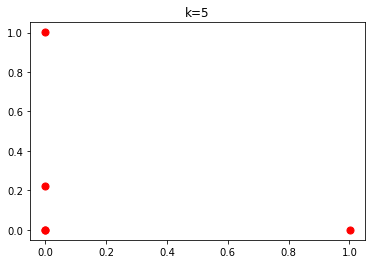

In [14]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('k=5')
plt.show()

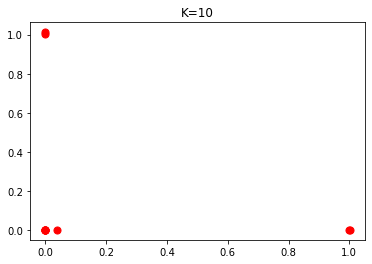

In [15]:
kmeans = KMeans(n_clusters=10).fit(df)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('K=10')
plt.show()

# PyCaret
- Using Automated ML library, I have attempted to apply different Machine Learning Algorithms with visualizations of Classification metrics of the top 3 models

In [16]:
from pycaret.classification import setup
from pycaret.classification import *

In [17]:
grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False, create_clusters=True)
# evaluate models and compare models
best = compare_models(n_select=3)
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0,0.8672,0.695,0.7299,0.679


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.101
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.101
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.107
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.068


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.101
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.107
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.042
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.013


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.101
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.107
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.042
et,Extra Trees Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.143
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.101
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.107
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.042
et,Extra Trees Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.143
lightgbm,Light Gradient Boosting Machine,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.279


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.679
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.171
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.014
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.101
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.107
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.042
et,Extra Trees Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.143
lightgbm,Light Gradient Boosting Machine,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.279


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1928, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1928, splitter='best'), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1928,
                solver='auto', tol=0.001)]


In [18]:
best = compare_models(sort = 'AUC') #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0,0.8672,0.695,0.7299,0.026


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.020
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.123
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.020
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.123
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.158
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.020
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017
ridge,Ridge Classifier,0.8473,0.0000,0.7658,1.0000,0.8672,0.6950,0.7299,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.123
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.158
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.028
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.020
svm,SVM - Linear Kernel,0.8366,0.0000,0.8105,0.9531,0.8658,0.6522,0.6964,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.123
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.158
et,Extra Trees Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.208
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.028
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073
qda,Quadratic Discriminant Analysis,0.8473,0.8829,0.7658,1.0000,0.8672,0.6950,0.7299,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.123
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.158
et,Extra Trees Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.208
lightgbm,Light Gradient Boosting Machine,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.036
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.028
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.026
dt,Decision Tree Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.011
rf,Random Forest Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.218
ada,Ada Boost Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.123
gbc,Gradient Boosting Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.158
et,Extra Trees Classifier,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.208
lightgbm,Light Gradient Boosting Machine,0.8473,0.9285,0.7658,1.0000,0.8672,0.6950,0.7299,0.036
nb,Naive Bayes,0.8471,0.9281,0.7658,0.9995,0.8670,0.6944,0.7292,0.012
lda,Linear Discriminant Analysis,0.8473,0.9281,0.7658,1.0000,0.8672,0.6950,0.7299,0.028
knn,K Neighbors Classifier,0.8269,0.9236,0.8334,0.9255,0.8628,0.6176,0.6694,0.073


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7775,0.9269,1.0000,0.7455,0.8542,0.4240,0.5187
1,0.8455,0.9198,0.7631,1.0000,0.8656,0.6916,0.7270
2,0.7874,0.9349,1.0000,0.7538,0.8596,0.4553,0.5429
3,0.7900,0.9297,1.0000,0.7561,0.8611,0.4631,0.5489
4,0.8084,0.9082,0.7056,1.0000,0.8274,0.6260,0.6750
5,0.8504,0.9335,0.7702,1.0000,0.8702,0.7006,0.7342
6,0.8609,0.8931,0.7863,1.0000,0.8804,0.7198,0.7498
7,0.8530,0.9336,0.7751,1.0000,0.8733,0.7048,0.7377
8,0.8399,0.9230,0.7550,1.0000,0.8604,0.6811,0.7186
9,0.8556,0.9339,0.7791,1.0000,0.8758,0.7096,0.7416


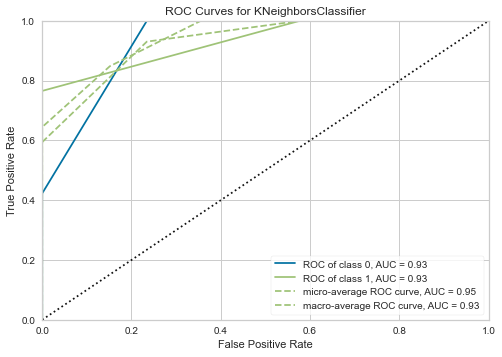

In [19]:
#using 10 fold cross-validation to compare the results
knn = create_model('knn', cross_validation = True)
plot_model(knn)

## Summary
- Clusters have been created after a thorough EDA and Feature Engineering of dataset, since most of the columns except for Has_Appt col, had string values so they were dropped after removing all missing values in the dataset.
- Since, the clusters require numerical data to process, most of the other columns were removed. The observation with 5 clusters was that 0.2, 0.1 and 1 were the localized centers of clusters.
- Using PyCaret Automated ML, the models performed great on the cleaned dataset, with high AUC. 